In [1]:
import numpy as np
import socket
import sys, time
import matplotlib.pyplot as plt
import rlgw
from rlgw.model import WORLD, ENV

In [2]:
def process_data(x):
    # # x = timestep, done, action, reward, slen, cS, nS
    xs = x.split(',')
    ts = int(xs[0])
    done = int(xs[1])
    action = int(xs[2])
    reward = int(xs[3])
    slen= int(xs[4])
    cS = np.array(xs[5:5+slen]).astype(np.int64)
    nS = np.array(xs[5+slen:5+2*slen]).astype(np.int64)
    
    np.copyto(env.S, cS)
    _ns, _r, _d, _ = env.step(action)
    env.plot()
    #fig, ax = plt.subplots(1,2, figsize=(12,6))
    #ax[0].imshow(cS[0:-4].reshape(5,7), cmap='PiYG')
    #ax[1].imshow(nS[0:-4].reshape(5,7), cmap='PiYG')
    #print(xs[0:5])
    #plt.show()
    
  # Now use the WORLD object to create an ENV object 
env = ENV(  world = WORLD.get_world(
                  R=5, C=7, 
                  SP=(0,0), EP=(4,6), 
                  RNDSP=True, RNDEP=False, 
                  EMPTY=-1, RRN=[-5,-5], RRP=[5,5],  
                  RD=0.4, PRD=0.5, ER=0, 
                  MAXTS=5*7*2, 
                  SID=None, 
                  name="some.world"),
          name="some.env", 
          penalty=(False, 0),  #<--- if True, imposes penalty on agent for staying in the same cell
          always_reinit=False)#<--- if True, always choose a new random initial state from distribution

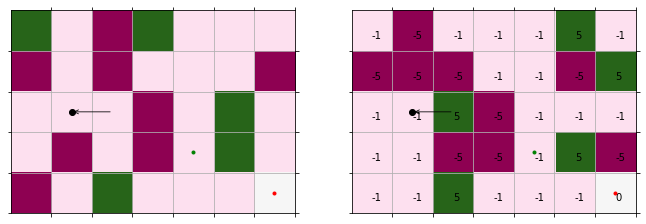

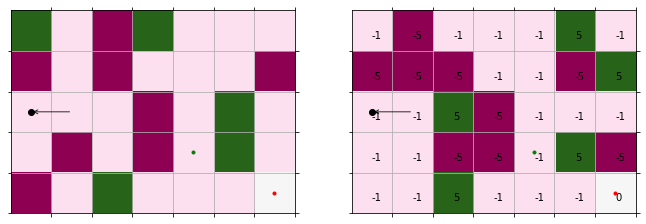

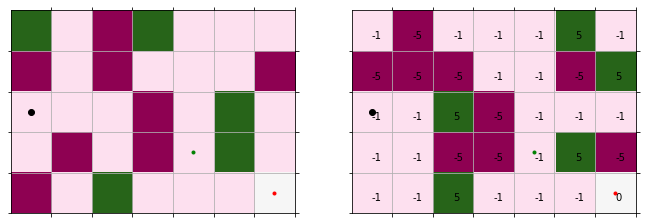

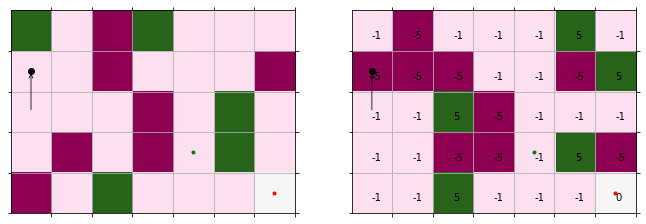

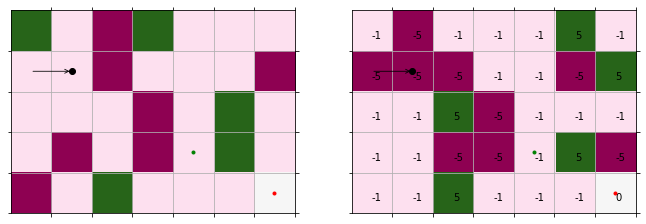

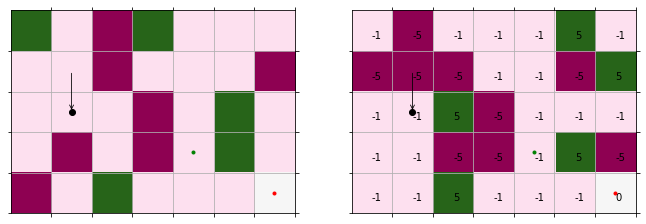

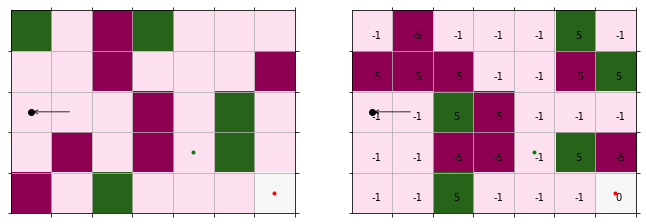

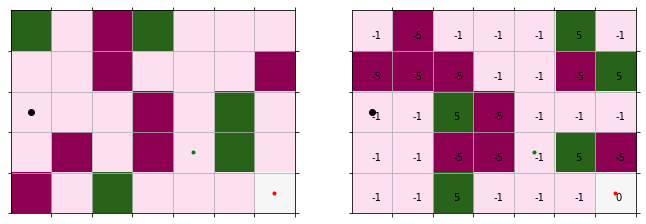

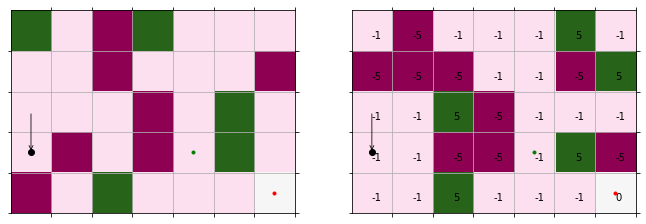

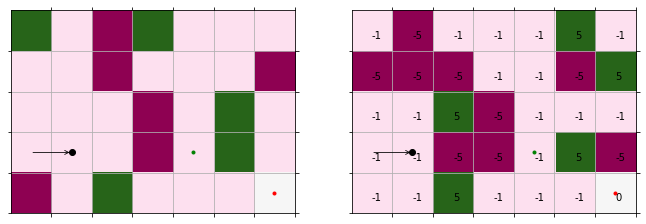

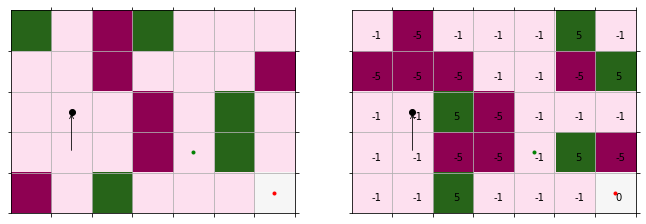

KeyboardInterrupt: 

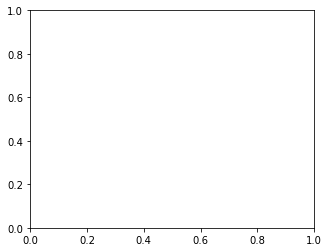

In [3]:

HOST, PORT = "localhost", 9999
#data = " ".join(sys.argv[1:])
while True:
    time.sleep(1.5)
    # Create a socket (SOCK_STREAM means a TCP socket)
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
        # Connect to server and send data
        sock.connect((HOST, PORT))
        #sock.sendall(bytes(data + "\n", "utf-8"))

        # Receive data from the server and shut down
        received = str(sock.recv(300), "utf-8")

    #print("Sent:     {}".format(data))
    #print("Received: {}".format(received))
    process_data(received)
    
#x = timestep, done, action, reward, slen, cS, nS